<a href="https://colab.research.google.com/github/adilsonvj/SME0130---Redes-Complexas-/blob/main/Redes_Complexas_Question%C3%A1rio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://web.icmc.usp.br/SCAPINST/identidade_visual/logomarca/LOGO%20ICMC%20RGB.png" height="200"/>
</div>

# Questionário: Grau e Transitividade

**Disciplina**: Redes Complexas SME0130 / 1º Semestre 2021
**Professor**: Francisco Rodrigues
**Aluno**: Adilson Vital Junior
**Número** USP: 9278160

In [ ]:
import networkx as nx
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def get_first_lines(file_path, n_lines = 5):
  """
    Inputs:
      - file_path: string with the file path
      - n_lines: number of lines to print
    Outputs:
      - first "n_lines" of the file located in "file_path"
  """
  with open(file_path, "r") as file:
    count = 0
    for line in file:
      if count == n_lines:
        break
      else:
        print(line)
        count = count + 1

def create_network_by_txt(file_path, weighted = False):
  """
    Inputs:
      - file_path: File with the path of the .txt file for the graph
      - weighted: Bool variable if the network is weighted or not.
    Outputs:
      - G: Graph already loaded 
  """
  G = nx.Graph()
  with open(file_path,"r") as file:
    for line in file: 
      line = line.replace("\n", "").split(" ")
      if weighted:
        G.add_edge(line[0], line[1], weight = line[2])
      else:
        G.add_edge(line[0], line[1])
  return G

def plot_network(G):
  """
    Inputs:
      - G: Graph to plot
    Outputs:
      - Return the plot of the network G
  """
  plt.figure(figsize=(10,5))
  pos = nx.spring_layout(G)
  nx.draw_networkx_nodes(G, node_size = 200, node_color = "yellow", pos = pos, alpha= 0.5)
  nx.draw_networkx_edges(G, width = 0.5, pos = pos, alpha = 0.5)
  nx.draw_networkx_labels(G, pos = pos, font_weight = "bold")
  plt.show()

def XMDD(G, X = 2):
  """
    Inputs:
      - G: Graph to get the momment of degree distribution
      - X: Number of degree, usually 2 is used
    Outputs:
      - XMDD: X momment of degree distribution for graph G
  """
  degree_list = list(dict(G.degree()).values())
  degree_arr = np.array(degree_list, dtype = "int")
  XMDD = np.mean(degree_arr**X)
  return XMDD

def get_network_description(G):
  print("A rede é formada por", len(G.nodes()), "Nós e", len(G.edges()), "Arestas")

def get_degree_distribution(G):
  """
    Inputs:
      - G: Graph to get the degree distribution
    Outputs:
      - k_arr: Array of degrees
      - P_k_arr: Array with the Probabilities to select a random degree
  """
  degree_list = list(dict(G.degree()).values())
  #degree_list.sort()
  degree_frequency = Counter(degree_list)
  k_arr = np.array(list(degree_frequency.keys()))
  P_k = np.array(list(degree_frequency.values()))
  P_k_arr = P_k / sum(P_k)
  return k_arr, P_k_arr

def plot_degree_distribution(k_list, Pk_list):
  """
    Inputs:
      - k_list: List of degrees
      - P_k_list: Probability associated with each degree
    Outputs:
      - Return the plot with the degree distribution
  """
  fig = plt.subplot(1,1,1)
  fig.set_xscale('log')
  fig.set_yscale('log')
  plt.plot(k_list, Pk_list,'bo')
  plt.xlabel("k", fontsize=20)
  plt.ylabel("P(k)", fontsize=20)
  plt.title("Degree distribution", fontsize=20)
  plt.show(True)

def get_complexity_coefficient(k_list, P_k_list):
  """
    Inputs:
      - k_list: List with the degrees 
      - P_k_list: List with the probabilities related to the degrees
    Outputs:
      - C_k: Complexity Coefficient 
  """
  E_K_2 = sum([(k**2)*Pk for k, Pk in zip(k_arr, P_k_arr)])
  E_K = sum([k*Pk for k, Pk in zip(k_arr, P_k_arr)])
  C_k = E_K_2 / E_K
  return C_k

def preprocess_graph(G):
  """
    Inputs:
      - G: Graph to be preprocessed
    Outputs:
      - G: Graph already preprocessed
  """
  G = G.to_undirected()
  G.remove_edges_from(nx.selfloop_edges(G))
  Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
  G = G.subgraph(Gcc[0])
  G = nx.convert_node_labels_to_integers(G, first_label=0)
  return G

def shannon_entropy(P_k_list):
  """
    Inputs:
      - P_k_list: List of probabilities of each degree to be selected
    Outputs:
      - H: Shannon Entropy
  """
  H = 0
  for p in P_k_list:
      if(p > 0):
          H = H - p*math.log(p, 2)
  return H

### **1. Para a base lesmis, calcule o terceiro e quarto momentos da distribuição do grau.**

Primeiro, vamos abrir os dados e printar as primeiras 5 linhas de forma a entender o que está contido nestes dados.

In [ ]:
lesmis_path = r"/content/drive/MyDrive/Redes Complexas/Questionários/Dados/lesmis.txt"
get_first_lines(lesmis_path, n_lines = 5)

1 2 1

2 3 8

2 4 10

2 5 1

2 6 1



Como é possível ver, as linhas são formadas por 3 colunas, possivelmente sendo a origem, destino e peso. Logo teremos de adicionar aresta por aresta da rede. Além disso, teremos que plotar a rede para verificar se foi carregada a rede corretamente.

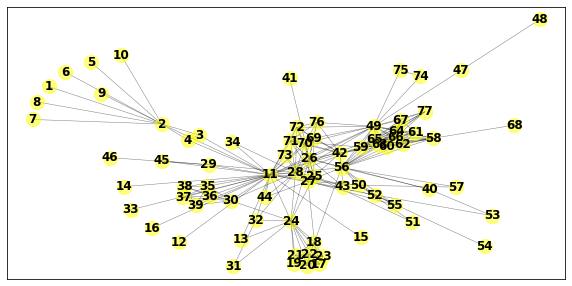

In [ ]:
G_lesmis = create_network_by_txt(lesmis_path, weighted = True)
#G_lesmis = preprocess_graph(G_lesmis)
plot_network(G_lesmis)

In [ ]:
get_network_description(G_lesmis)

A rede é formada por 77 Nós e 254 Arestas


A questão pede para calcularmos o terceiro e quarto momento da distribuição de grau desta rede. Sendo o momento calculado por: 

$$\frac{1}{N} \sum_{n \in N} degree(n)^{m} \text{, Sendo N o conjunto de nós de G, e m o grau de distribuição.}$$

In [ ]:
_3MDD = XMDD(G_lesmis, 3)
_4MDD = XMDD(G_lesmis, 4)

print("O terceiro grau de distribuição da rede é", "%.4f"%_3MDD, "e o quarto grau é", "%.4f"%_4MDD)

O terceiro grau de distribuição da rede é 1408.0260 e o quarto grau é 33592.7273


### **2. Calcule o coeficiente de complexidade da power grid**

Assim como no arquivo anterior, vamos novamente observar as primeiras linhas do arquivo para entender os nossos dados.

In [ ]:
powergrid_path = r"/content/drive/MyDrive/Redes Complexas/Questionários/Dados/powergrid.txt"
get_first_lines(powergrid_path, n_lines = 5)

1 2

1 3

1 4

2 428

2 435



Diferentemente do anterior, aqui os dados são formados apenas por nó de origem e destino, sem ter o peso entre as arestas. Logo, teremos que levar em consideração isso na hora da leitura.

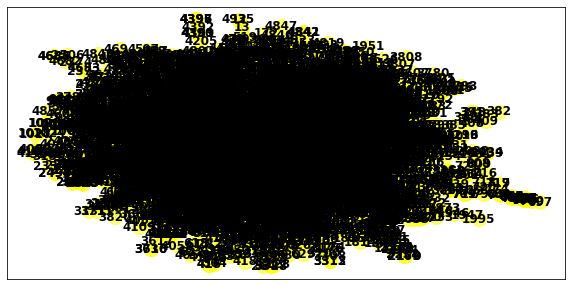

A rede é formada por 4941 Nós e 6594 Arestas


In [ ]:
G_powergrid = create_network_by_txt(powergrid_path, weighted = False)
#G_powergrid = preprocess_graph(G_powergrid)
plot_network(G_powergrid)
get_network_description(G_powergrid)

Com tantos nós e arestas está explicado o porque que mal conseguimos ver a rede..

Agora, teremos que calcular o coeficiente de complexidade que é dado por:

$$C_{x} = \frac{E[K^{2}]}{E[K]} = \frac{\sum_{k} k^{2} * P(k)}{\sum_{k} k * P(k)}$$

Logo, primeiro teremos que pegar a distribuição de grau dos nós, então iremos plotar a distribuição no gráfico log-log.

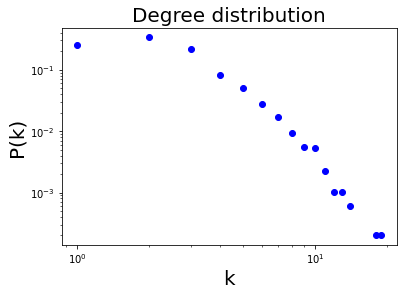

In [ ]:
k_arr, P_k_arr = get_degree_distribution(G_powergrid)
plot_degree_distribution(k_arr, P_k_arr)

Agora que temos a lista de graus e suas respectivas probabilidades de serem aleatoriamente escolhidos podemos calcular o coeficiente de complexidade.

In [ ]:
XMDD(G_powergrid, 2)/XMDD(G_powergrid, 1)

3.8712465878070974

In [ ]:
C_x = get_complexity_coefficient(k_arr, P_k_arr)
print("O coeficient de complexidade da rede powergrid é", "%.4f"%C_x)

O coeficient de complexidade da rede powergrid é 3.8712


### **3. Calcule a entropia de Shannon da rede Euro road.**

Primeiro, vamos observar as primeiras linhas do arquivo euroroad.

In [ ]:
euroroad_path = r"/content/drive/MyDrive/Redes Complexas/Questionários/Dados/euroroad.txt"
get_first_lines(euroroad_path, n_lines = 5)

1 2

2 3

2 17

3 4

4 5



Aqui podemos observar que suas linhas é constituidas de um nó de origem e um de destino, sem peso associado a aresta.

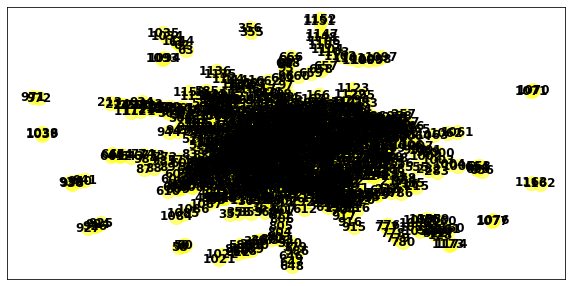

A rede é formada por 1174 Nós e 1417 Arestas


In [ ]:
G_euroroad = create_network_by_txt(euroroad_path, weighted = False)
#G_euroroad = preprocess_graph(G_euroroad)
plot_network(G_euroroad)
get_network_description(G_euroroad)

Para o cálculo da entropia de Shannon, primeiro é necessário o cálculo da distribuição dos graus da rede.

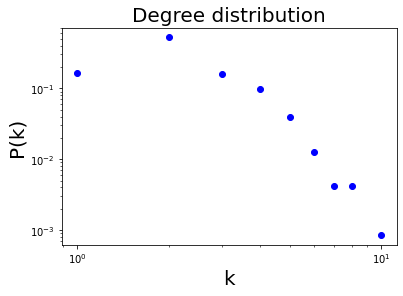

In [ ]:
k_arr, P_k_arr = get_degree_distribution(G_euroroad)
plot_degree_distribution(k_arr, P_k_arr)

Agora sim podemos fazer o cálculo a partir da seguinte fórmula:

$$H(k) = - \sum_{k} P(k) * log_{2}(P(k))$$

In [ ]:
SH = shannon_entropy(P_k_arr)
print("A entropia de Shannon para a rede Euro road é", "%.4f"%SH)

A entropia de Shannon para a rede Euro road é 2.0033


### **4. Para a rede de aeroportos dos Estados Unidos, obtenha: (a) transitivity e (b) the average clustering coefficient.**

Aqui iremos printar as primeiras linhas do arquivo usairport.txt

In [ ]:
usairport_path = r"/content/drive/MyDrive/Redes Complexas/Questionários/Dados/usairport.txt"
get_first_lines(usairport_path, n_lines = 5)

1 2 1

1 3 7

4 5 3

6 7 5

6 8 14137



Podemos observar que a rede é composta por um nó de origem, seu destino, e o peso desta aresta.

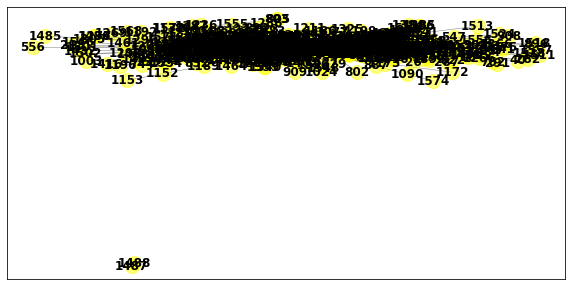

A rede é formada por 1574 Nós e 17215 Arestas


In [ ]:
G_usairport = create_network_by_txt(usairport_path, weighted = True)
#G_usairport = preprocess_graph(G_usairport)
plot_network(G_usairport)
get_network_description(G_usairport)

In [ ]:
transitivity = nx.transitivity(G_usairport)
avg_clustering = nx.average_clustering(G_usairport)
print("Para a rede US Airport, a transitividade é", "%.4f"%transitivity, "e o coeficiente de clustering médio é", "%.4f"%avg_clustering)

Para a rede US Airport, a transitividade é 0.3841 e o coeficiente de clustering médio é 0.5042


### **5. Calcule o coeficiente de complexidade e a entropia de Shannon para a rede US airport.**

Como se trata da mesma rede utilizada no exercício 4, aqui a utilizaremos sem precisar carregá-la novamente.
A primeira tarefa aqui é de pegar a distribuição de grau dos nós desta rede.

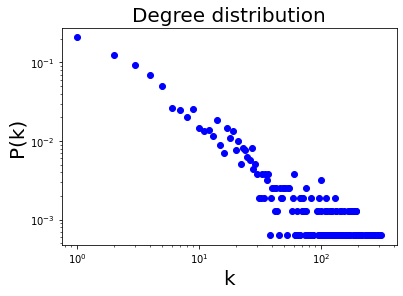

In [ ]:
k_arr, P_k_arr = get_degree_distribution(G_usairport)
plot_degree_distribution(k_arr, P_k_arr)

Podemos observar que a rede segue a distribuição *power-law*, onde poucos nós tem altos graus, e muitos nós tem baixo grau. Agora utilizaremos os graus e suas probabilidades para encontrar o coeficiente de complexidade e a entropia de Shannon.

In [ ]:
C_x = get_complexity_coefficient(k_arr, P_k_arr)
SH = shannon_entropy(P_k_arr)
print("O coeficient de complexidade da rede US airport é", "%.4f"%C_x, "e a entropia de Shannon é", "%.4f"%SH)

O coeficient de complexidade da rede US airport é 112.2222 e a entropia de Shannon é 4.9860
